In [1]:
from nltk.tokenize import sent_tokenize
def custom_sent_tokenize(text):
    sentences = []
    paragraphs = [p for p in text.split('\n') if p]
    for paragraph in paragraphs:
        paragraph = paragraph + '\n'
        sentences.extend(sent_tokenize(paragraph))
        
    return sentences

In [3]:
import pandas as pd
TRAINING_EXTERNAL_FILE = '../data/feather/external_feather'
data = pd.read_feather(TRAINING_EXTERNAL_FILE).sample(10000)

data['label'] = [len(x) > 0 for x in data['positions']]
data['pos'] = [[] if x is '' else [int(x)] for x in data['positions']]
data['num_sent'] = [len(custom_sent_tokenize(d)) for d in data.text]
data.head()

,index,positions,text,label,pos,num_sent
112834,0,2166,The sequel to Spider-Man brings the audience t...,True,[2166],28
83975,0,,Che Rivera (Benjamin Bratt) defines himself no...,False,[],51
154671,0,,"So, I've mentioned in a few reviews already th...",False,[],28
99595,0,,I have often thought it would be fun to write ...,False,[],25
189319,0,,"Ah, Mooby... Kevin Smith is one of the hottest...",False,[],38


In [4]:
data.shape

(10000, 6)

AxesSubplot(0.125,0.125;0.775x0.755)


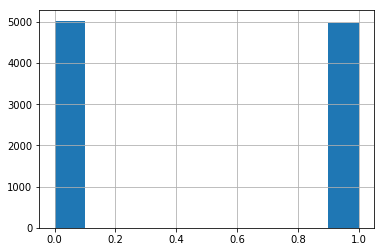

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure()   
print(data.label.hist())

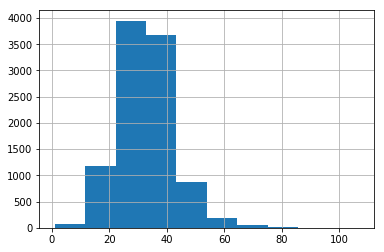

In [6]:
data.num_sent.hist()

In [7]:
data.num_sent.describe()

count    10000.000000
mean        32.726600
std          9.528742
min          1.000000
25%         27.000000
50%         32.000000
75%         38.000000
max        107.000000
Name: num_sent, dtype: float64

Text(0.5,0,'')

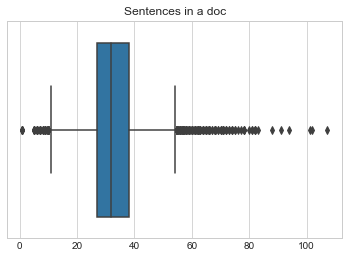

In [8]:
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
plt.title('Sentences in a doc')
ax = sns.boxplot(x=data.num_sent)
plt.rcParams.update({'font.size': 16})
ax.set_xlabel('')

In [9]:
df = data

In [10]:
df_splits = []
df_true = df[df.label==True]
df_true.head()

,index,positions,text,label,pos,num_sent
112834,0,2166,The sequel to Spider-Man brings the audience t...,True,[2166],28
163484,0,2106,Comic book fans are in Heaven right now. Movie...,True,[2106],32
104512,0,2093,"Grim, grim story that cuts everything down to ...",True,[2093],35
206504,0,2116,Compared to many recent Bigfoot-inspired flick...,True,[2116],48
54130,0,2199,A strange thing happened as I watched Bill Con...,True,[2199],48


In [11]:
for index, row in df_true.iterrows():
    for i, pos in enumerate(row['pos']):
        last=0
        if i!=0:
            last = row['pos'][i-1]            
        
        df_splits.append(row['text'][last:pos])
        
    df_splits.append(row['text'][row['pos'][-1]:])

In [12]:
len(df_splits)

9944

In [13]:
split_sents = [len(custom_sent_tokenize(s)) for s in df_splits]

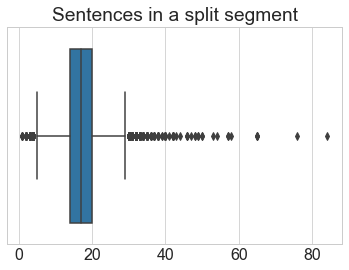

In [14]:
sns.set_style("whitegrid")
#plt.xticks(np.arange(0, 150, 5.0))
plt.rcParams.update({'font.size': 16})
plt.title('Sentences in a split segment')
sns.boxplot(x=split_sents)

In [15]:
max(split_sents)

84

In [16]:
min(split_sents)

1

In [17]:
np.mean(split_sents)

17.19569589702333

In [18]:
np.median(split_sents)

17.0

In [19]:
np.percentile(split_sents, 5)

10.0

In [20]:
min_sent = [s for s in df_splits if len(custom_sent_tokenize(s)) <3]

In [21]:
len(min_sent)

18

In [22]:
for segm in min_sent:
    sents = custom_sent_tokenize(segm)
    print(len(sents))
    for s in sents:
        print(s)
        print('-----------------------------')
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')

1
I recently saw the doom movie ,the movie I have been waiting for MONTHS to see and finally got the chance.The game was quite satanic with pentagrams,heavy weaponary,exceptionally frightning monsters and total darkness and hell.The legion of DOOM fans expected to see all these elements in the movie.The previews highlighted that the movie will have lots of gore ,swearing and R rated themes.But all these elements didn's make up for the fact that DOOM was not DOOM 3 (which I suppose it meant to be)The greatest mistake the producers made was removing the hellish theme and puttting in another resident evil decoy.Also is the fact that aliens did the same thing (at least they were original in their time).But this is only the beginning, The movie starts in a really mind blowing way witb mars in the most satanic picture and olduvai being overrun by creatures and scientists fleeing for their life.Within five minutes the gore starts to take place with somebody's arm being crushed within closing 

In [39]:
max_sent = df[df['num_sent'] > 100]

In [42]:
max_sent

,index,positions,text,label,pos,num_sent
13198,0,2133,"The Girl Who Played with Fire, 2010 film The f...",True,[2133],107
60850,0,2168,My first watch of Hostel: Part II on DVD. . . ...,True,[2168],101
196667,0,,"Marnie, 1964 film The story begins with a woma...",False,[],102


In [44]:
for text in max_sent.text:
    sents = custom_sent_tokenize(text)
    print(len(sents))
    for s in sents:
        print(s)
        print('-----------------------------')
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')

107
The Girl Who Played with Fire, 2010 film The film starts with a nude woman living in a large house in the country.
-----------------------------
How can she afford it?
-----------------------------
She searches for "Legal Services".
-----------------------------
Tattoo removal?
-----------------------------
A man meets her lawyer Bjurman.
-----------------------------
"I'll be in touch."
-----------------------------
Lisbeth watches an apartment.
-----------------------------
She finds blank reports, and a revolver.
-----------------------------
'Millennium' editor Mikael has a new story about the sex trade in Sweden.
-----------------------------
This crime has low priority in the Justice Ministry.
-----------------------------
[Could there be a payoff?]
-----------------------------
Lisbeth has been away for a year, traveling abroad.
-----------------------------
She offers her apartment to a girl friend.
-----------------------------
They are close friends.
---------------------